In [232]:
%load_ext autoreload
%autoreload 2
import glob
import json
import numpy as np
import pandas as pd
import import_lakes
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import Ridge, Lasso, ARDRegression, BayesianRidge

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
df_marc = import_lakes.import_lake_greifen()
df_marc["day"] = df_marc["date"].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))

In [235]:
df_marc_day = df_marc.groupby("day").mean()
df_marc_day.reset_index(inplace=True)

/tmp/ipykernel_4013/841878201.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_marc_day = df_marc.groupby("day").mean()


In [236]:
df_marc_day

,day,x,z,z1,z2,z3,z4,z5,z6,z7,z8,z9
0,2020-07-01,1.593616e+09,9.411400,0.365100,0.250200,69.272998,7.16000,7.934400,14.480000,-0.30000,3.44000,1.33000
1,2020-07-02,1.593686e+09,11.051563,0.378125,0.249437,83.203125,8.60000,8.027438,13.687500,-0.15000,3.65000,0.31875
2,2020-07-03,1.593773e+09,10.363875,0.374125,0.250000,84.584375,8.74375,8.000063,12.081250,-0.13125,3.51250,-1.85625
3,2020-07-04,1.593859e+09,10.819937,0.377125,0.249875,80.153124,8.34375,8.004500,10.706250,-0.08750,3.80625,-1.70000
4,2020-07-05,1.593946e+09,10.577937,0.375500,0.249875,81.196876,8.47500,7.985687,10.500000,-0.03125,3.58125,0.51875
...,...,...,...,...,...,...,...,...,...,...,...,...
986,2023-04-23,1.682241e+09,8.087000,345.362495,464.687492,97.476250,8.58750,10.354250,14.637500,2.32500,2.87500,-1.17500
987,2023-04-24,1.682327e+09,7.203625,336.387497,465.074997,89.298748,8.13750,10.228250,10.512500,2.35000,1.81250,-0.86250
988,2023-04-25,1.682414e+09,8.200000,345.825005,465.249992,95.633751,8.51250,10.329000,12.025000,2.35000,2.37500,-2.18750
989,2023-04-26,1.682500e+09,8.793750,351.087494,464.537506,98.126251,8.56250,10.427750,14.937500,2.37500,2.96250,-1.42500


In [2]:
df = import_lakes.import_lake(r'./data/lakegreifenctdprofiles_datalakesdownload/*.json')

In [3]:
df['x'].values[0] / 60 /60 - df['x'].values[8] / 60 /60

-24.0

In [6]:
df.sort_values(by="x",inplace=True)

In [7]:
day_df = pd.DataFrame([df.to_numpy()[i*8:(i+1)*8].mean(axis=0) for i in range(len(df)//8)],columns=df.columns)

In [8]:
day_df

,x,z,z1,z2,z3,z4,z5,z6,z7,z8,z9
0,1.593633e+09,9.914375,0.368563,0.250000,70.923749,7.37500,7.953188,14.26250,-0.25000,3.46875,-0.36875
1,1.593719e+09,10.816688,0.376937,0.249563,90.485001,9.22500,8.042875,13.77500,-0.11875,3.69375,0.29375
2,1.593805e+09,10.702438,0.376812,0.249875,79.800000,8.34375,7.987875,11.38125,-0.13750,3.77500,-1.81875
3,1.593892e+09,10.936375,0.378625,0.250000,82.480000,8.55000,8.012750,10.71875,0.00000,3.83125,-1.71250
4,1.593978e+09,10.504125,0.374938,0.249875,79.435624,8.32500,7.973062,10.49375,-0.04375,3.41250,0.51875
...,...,...,...,...,...,...,...,...,...,...,...
791,1.681658e+09,7.729063,339.412498,463.231247,102.089374,9.02500,10.119812,15.81250,1.80000,2.90000,-3.05625
792,1.681831e+09,7.400437,336.993752,463.937496,96.271875,8.71250,10.044563,12.76875,1.86250,2.25625,-3.07500
793,1.682003e+09,7.876125,342.250000,464.543743,95.108749,8.51875,10.219688,15.11875,2.23750,2.82500,-3.25000
794,1.682176e+09,7.771437,341.250000,464.724998,94.716874,8.37500,10.324188,13.72500,2.35000,2.60625,-1.57500


In [9]:
day_df['z6'] = np.maximum(day_df['z6'],3)

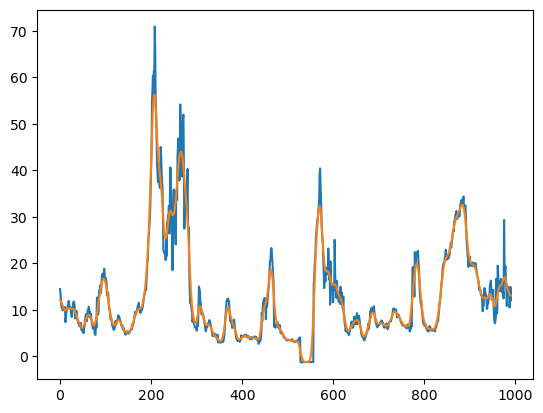

In [237]:
#plt.plot(day_df['z6'].values)
plt.plot(df_marc_day['z6'].values)
#plt.plot(gaussian_filter1d(day_df['z6'].values,4))
plt.plot(gaussian_filter1d(df_marc_day['z6'].values,4))

ridge/lasso: train on first 600

In [287]:
#z6data = gaussian_filter1d(day_df['z6'].values,4)
z6data = gaussian_filter1d(df_marc_day['z6'].values,4)

In [288]:
chloro = z6data[:600]
n_steps = 14
X_train, Y_train = [], []
for i in range(n_steps, len(chloro)-6):
    X_train.append(chloro[i-n_steps:i])
    Y_train.append(chloro[i+6])

In [289]:
ridgeRegression = Ridge()
lassoRegression = Lasso()
ridgeRegression.fit(X_train, Y_train)
lassoRegression.fit(X_train, Y_train)
predictions_train_ridge = ridgeRegression.predict(X_train)
predictions_train_lasso = lassoRegression.predict(X_train)
ard = ARDRegression()
bayesian = BayesianRidge()
ard.fit(X_train,Y_train)
bayesian.fit(X_train,Y_train)
prediction_ard_7days = ard.predict(X_train)
prediction_bayesian_7days = bayesian.predict(X_train)

/home/jbraun/miniconda3/envs/DSTSES/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+01, tolerance: 8.495e+00
  model = cd_fast.enet_coordinate_descent(


In [292]:
chloro = z6data[600:]
n_steps = 14
X_test, Y_test = [], []
for i in range(n_steps, len(chloro)-6):
    X_test.append(chloro[i-n_steps:i])
    Y_test.append(chloro[i+6])

In [293]:
len(X_train)

580

In [294]:
predictions_test_ridge = ridgeRegression.predict(X_test)
predictions_test_lasso = lassoRegression.predict(X_test)
predictions_test_ard = ard.predict(X_test)
predictions_test_bayesian = bayeisan.predict(X_test)

Plot according to Paul's colour scheme

(-28.950000000000003, 607.95)

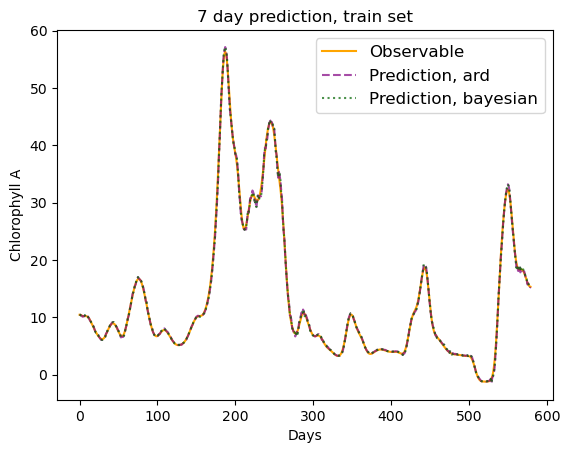

In [295]:
fig, axd = plt.subplot_mosaic([['Prediction7days']])
ax = axd['Prediction7days']
ax.plot(np.array(Y_train).tolist(),label='Observable',color='orange')
#ax.plot(predictions_train_ridge,label='Prediction, ridge',color='green',alpha=0.5)
#ax.plot(predictions_train_lasso,label="Prediction, lasso", color="blue",alpha=0.5)
ax.plot(prediction_ard_7days,label='Prediction, ard',linestyle="--",color='purple',alpha=0.7)
ax.plot(prediction_bayesian_7days,label="Prediction, bayesian",linestyle=":",color="darkgreen",alpha=0.7)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("7 day prediction, train set")
plt.legend(fontsize=12)
plt.xlim()

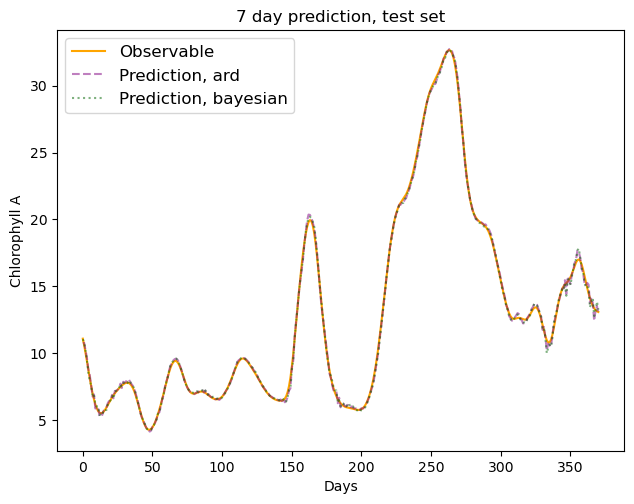

In [296]:
fig,axd = plt.subplot_mosaic([["Predictions7days"]])
fig.tight_layout()
ax = axd["Predictions7days"]
ax.plot(np.array(Y_test).tolist(),label='Observable',color='orange')
#ax.plot(predictions_test_ridge,label='Prediction, ridge',color='green',alpha=0.5)
#ax.plot(predictions_test_lasso,label='Prediction, lasso',color="blue",alpha=0.5)
ax.plot(predictions_test_ard,label='Prediction, ard',linestyle='--',color='purple',alpha=0.5)
ax.plot(predictions_test_bayesian,label='Prediction, bayesian',linestyle=":",color="darkgreen",alpha=0.5)
s = 70
#ax.fill_between(range(s,s+14),0,40, alpha=0.5,color='grey',label='Input Features')
#ax.vlines(s+28,0,40,linestyles='dashed',colors = 'green',label='14 days')
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("7 day prediction, test set")
ax.legend(fontsize=12)

14 days ahead

In [297]:
chloro = z6data[:600]
n_steps = 14
X_train, Y_train = [], []
for i in range(n_steps, len(chloro)-13):
    X_train.append(chloro[i-n_steps:i])
    Y_train.append(chloro[i+13])

In [298]:
len(X_train)

573

In [299]:
ridgeRegression = Ridge(alpha=1.0)
lassoRegression = Lasso(alpha=1.0)
ardRegression_14days = ARDRegression()
bayesian_14days = BayesianRidge()
ridgeRegression_alpha5 = Ridge(alpha=10.0)
lassoRegression_alpha5 = Lasso(alpha=10.0)
ridgeRegression.fit(X_train, Y_train)
lassoRegression.fit(X_train, Y_train)
bayesian_14days.fit(X_train,Y_train)
ardRegression_14days.fit(X_train,Y_train)
ridgeRegression_alpha5.fit(X_train, Y_train)
lassoRegression_alpha5.fit(X_train, Y_train)
predictions_train_ridge_14days = ridgeRegression.predict(X_train)
predictions_train_ridge_14days_alpha5 = ridgeRegression_alpha5.predict(X_train)
predictions_train_ard_14days = ardRegression_14days.predict(X_train)
predictions_train_bayesian_14days = bayesian_14days.predict(X_train)
predictions_train_lasso_14days = lassoRegression.predict(X_train)
predictions_train_lasso_14days_alpha5 = lassoRegression_alpha5.predict(X_train)

/home/jbraun/miniconda3/envs/DSTSES/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.461e+01, tolerance: 8.489e+00
  model = cd_fast.enet_coordinate_descent(


(-28.6, 600.6)

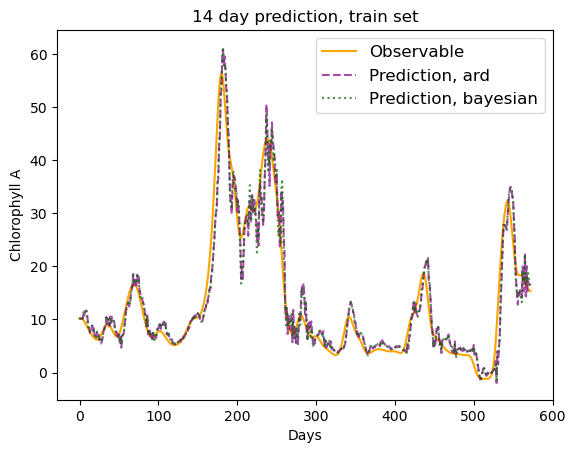

In [302]:
fig, axd = plt.subplot_mosaic([['Prediction14daysAlphas']])
ax = axd['Prediction14daysAlphas']
ax.plot(np.array(Y_train).tolist(),label='Observable',color='orange')
ax.plot(predictions_train_ard_14days,label='Prediction, ard',linestyle="--",color='purple',alpha=0.7)
#ax.plot(predictions_train_ridge_14days,label='Prediction, ridge',color='green', alpha=0.5)
ax.plot(predictions_train_bayesian_14days,label='Prediction, bayesian',linestyle=":",color='darkgreen',alpha=0.7)
#ax.plot(predictions_train_lasso_14days_alpha5,label='Prediction, lasso',color='blue', alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("14 day prediction, train set")
plt.legend(fontsize=12)
plt.xlim()

(-28.6, 600.6)

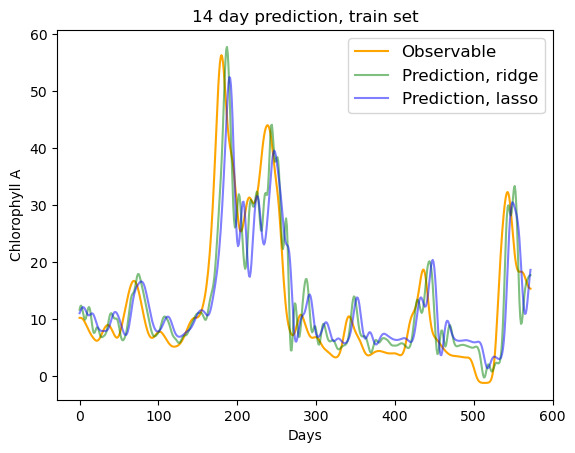

In [269]:
fig, axd = plt.subplot_mosaic([['Prediction14days']])
ax = axd['Prediction14days']
ax.plot(np.array(Y_train).tolist(),label='Observable',color='orange')
ax.plot(predictions_train_ridge_14days,label='Prediction, ridge',color='green',alpha=0.5)
ax.plot(predictions_train_lasso_14days,label='Prediction, lasso',color='blue', alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("14 day prediction, train set")
plt.legend(fontsize=12)
plt.xlim()

In [303]:
chloro = z6data[600:]
n_steps = 14
X_test, Y_test = [], []
for i in range(n_steps, len(chloro)-13):
    X_test.append(chloro[i-n_steps:i])
    Y_test.append(chloro[i+13])

In [304]:
#predictions_test_ridge_14days = ridgeRegression.predict(X_test)
predictions_test_ridge_14days = ridgeRegression.predict(X_test)
predictions_test_ard_14days = ardRegression_14days.predict(X_test)
predictions_test_bayesian_14days = bayesian_14days.predict(X_test)
predictions_test_lasso_14days = lassoRegression.predict(X_test)

(0.0, 40.0)

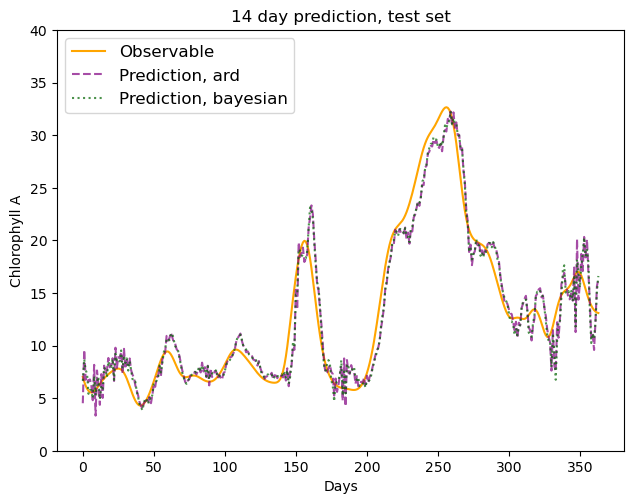

In [305]:
fig,axd = plt.subplot_mosaic([["Prediction14days"]])
fig.tight_layout()
ax = axd["Prediction14days"]
ax.plot(np.array(Y_test).tolist(),label='Observable',color='orange')
ax.plot(predictions_test_ard_14days,label='Prediction, ard',linestyle="--",color='purple',alpha=0.7)
ax.plot(predictions_test_bayesian_14days,label='Prediction, bayesian',linestyle=":",color='darkgreen',alpha=0.7)
#ax.plot(predictions_test_ridge_14days,label='Prediction, ridge',color='green',alpha=0.5)
#ax.plot(predictions_test_lasso_14days,label='Prediction, lasso',color='blue',alpha=0.5)
#s = 70
#ax.fill_between(range(s,s+14),0,40, alpha=0.5,color='grey',label='Input Features')
#ax.vlines(s+28,0,40,linestyles='dashed',colors = 'green',label='14 days')
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.legend(fontsize=12)
ax.set_title("14 day prediction, test set")
ax.set_ylim([0,40])

21 days ahead

In [309]:
chloro = z6data[:600]
n_steps = 14
X_train, Y_train = [], []
for i in range(n_steps, len(chloro)-20):
    X_train.append(chloro[i-n_steps:i])
    Y_train.append(chloro[i+20])

In [310]:
len(X_train)

566

In [311]:
ridgeRegression = Ridge(alpha=1.0)
lassoRegression = Lasso(alpha=1.0)
ardRegression = ARDRegression()
bayesianRegression = BayesianRidge()
ridgeRegression.fit(X_train, Y_train)
lassoRegression.fit(X_train, Y_train)
ardRegression.fit(X_train,Y_train)
bayesianRegression.fit(X_train,Y_train)
predictions_train_ridge_21days = ridgeRegression.predict(X_train)
predictions_train_lasso_21days = lassoRegression.predict(X_train)
predictions_train_ard_21days = ardRegression.predict(X_train)
predictions_train_bayesian_21days = bayesianRegression.predict(X_train)

/home/jbraun/miniconda3/envs/DSTSES/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.312e+01, tolerance: 8.483e+00
  model = cd_fast.enet_coordinate_descent(


(-28.25, 593.25)

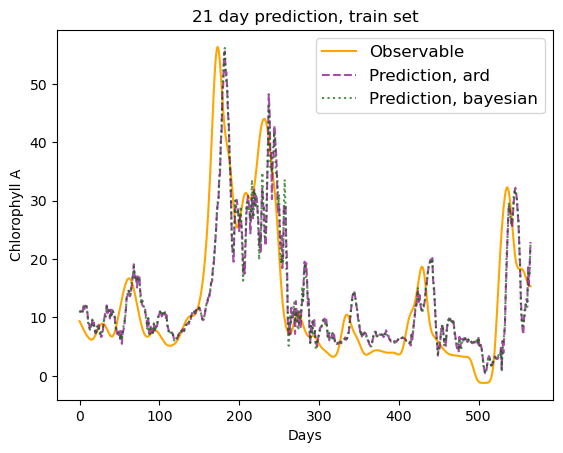

In [312]:
fig, axd = plt.subplot_mosaic([['Prediction21days']])
ax = axd['Prediction21days']
ax.plot(np.array(Y_train).tolist(),label='Observable',color='orange')
ax.plot(predictions_train_ard_21days,label='Prediction, ard',color='purple',alpha=0.7,linestyle="--")
ax.plot(predictions_train_bayesian_21days,label='Prediction, bayesian',color='darkgreen',alpha=0.7,linestyle=":")
#ax.plot(predictions_train_ridge_21days,label='Prediction, ridge',color='green',alpha=0.5)
#ax.plot(predictions_train_lasso_21days,label='Prediction, lasso',color='blue', alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("21 day prediction, train set")
plt.legend(fontsize=12)
plt.xlim()

In [313]:
chloro = z6data[600:]
n_steps = 14
X_test, Y_test = [], []
for i in range(n_steps, len(chloro)-20):
    X_test.append(chloro[i-n_steps:i])
    Y_test.append(chloro[i+20])

In [314]:
len(X_test)

357

In [316]:
predictions_test_ridge_21days = ridgeRegression.predict(X_test)
predictions_test_lasso_21days = lassoRegression.predict(X_test)
predictions_test_ard_21days = ardRegression.predict(X_test)
predictions_test_bayesian_21days = bayesianRegression.predict(X_test)

Text(0.5, 1.0, '21 day prediction, test set')

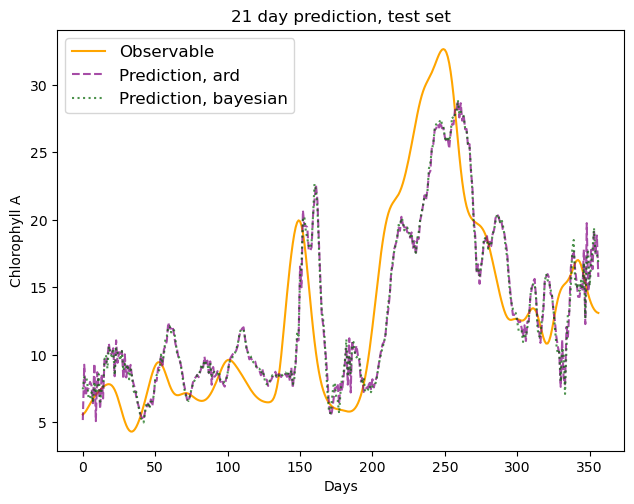

In [317]:
fig,axd = plt.subplot_mosaic([["Prediction21days"]])
fig.tight_layout()
ax = axd["Prediction21days"]
ax.plot(np.array(Y_test).tolist(),label='Observable',color='orange')
ax.plot(predictions_test_ard_21days,label='Prediction, ard',linestyle="--",color="purple",alpha=0.7)
ax.plot(predictions_test_bayesian_21days,label='Prediction, bayesian',linestyle=":",color="darkgreen",alpha=0.7)
#ax.plot(predictions_test_ridge_21days,label='Prediction, ridge',color='green',alpha=0.5)
#ax.plot(predictions_test_lasso_21days,label='Prediction, lasso',color='blue',alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.legend(fontsize=12)
ax.set_title("21 day prediction, test set")

relative change predictions

In [146]:
chloro =  z6data[:600]
n_steps = 14
X_train, Y_train = [], []
for i in range(n_steps+1, len(chloro)-6):
    X_train.append( chloro[i-n_steps:i])
    Y_train.append((chloro[i+6] / chloro[i-1] ))

In [147]:
ridgeRegression = Ridge(alpha=1.0)
lassoRegression = Lasso(alpha=1.0)
ridgeRegression.fit(X_train, Y_train)
lassoRegression.fit(X_train, Y_train)
predictions_train_ridge_relative = ridgeRegression.predict(X_train)
predictions_train_lasso_relative = lassoRegression.predict(X_train)

(-28.900000000000002, 606.9)

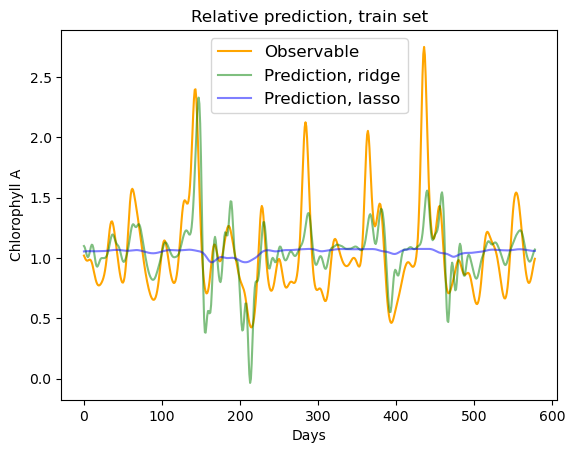

In [156]:
fig, axd = plt.subplot_mosaic([['PredictionRelative']])
ax = axd['PredictionRelative']
ax.plot(np.array(Y_train).tolist(),label='Observable',color='orange')
ax.plot(predictions_train_ridge_relative,label='Prediction, ridge',color='green',alpha=0.5)
ax.plot(predictions_train_lasso_relative,label='Prediction, lasso',color='blue', alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.set_title("Relative prediction, train set")
plt.legend(fontsize=12)
plt.xlim()

In [151]:
chloro =  z6data[600:]
n_steps = 14
X_test, Y_test = [], []
for i in range(n_steps+1, len(chloro)-6):
    X_test.append( chloro[i-n_steps:i])
    Y_test.append((chloro[i+6] / chloro[i-1] ))

In [152]:
predictions_test_ridge_relative = ridgeRegression.predict(X_test)
predictions_test_lasso_relative = lassoRegression.predict(X_test)

Text(0.5, 1.0, 'Relative prediction, test set')

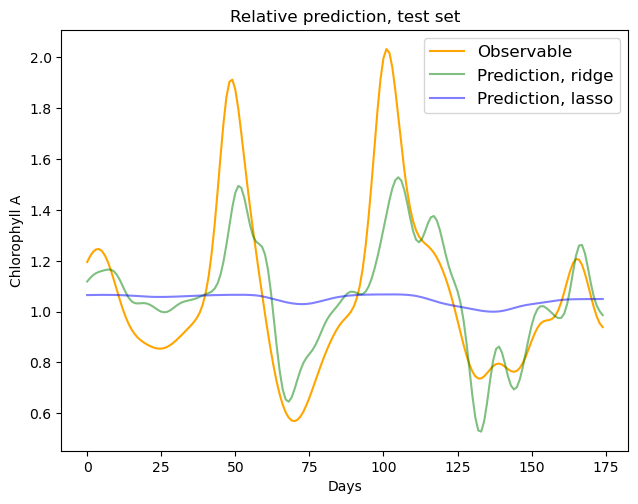

In [155]:
fig,axd = plt.subplot_mosaic([["PredictionRelative"]])
fig.tight_layout()
ax = axd["PredictionRelative"]
ax.plot(np.array(Y_test).tolist(),label='Observable',color='orange')
ax.plot(predictions_test_ridge_relative,label='Prediction, ridge',color='green',alpha=0.5)
ax.plot(predictions_test_lasso_relative,label='Prediction, lasso',color='blue',alpha=0.5)
ax.set_xlabel('Days')
ax.set_ylabel('Chlorophyll A')
ax.legend(fontsize=12)
ax.set_title("Relative prediction, test set")